# Time series Weather Forecasting

In [3]:
# time series library import
import os
import datetime
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore") 

In [4]:
# managing figure size 
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False

# import the weather dataset

In [5]:
from zipfile import ZipFile
import tensorflow as tf

# Import keras utils
from tensorflow import keras

# Dataset URL
uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"

# Download the file using keras utility
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")

# Extract the contents
zip_file = ZipFile(zip_path)
zip_file.extractall()


In [6]:
df = pd.read_csv("jena_climate_2009_2016.csv")
df.head(10)

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   
5  01.01.2009 01:00:00    996.50     -8.05    265.38        -8.78    94.4   
6  01.01.2009 01:10:00    996.50     -7.62    265.81        -8.30    94.8   
7  01.01.2009 01:20:00    996.50     -7.62    265.81        -8.36    94.4   
8  01.01.2009 01:30:00    996.50     -7.91    265.52        -8.73    93.8   
9  01.01.2009 01:40:00    996.53     -8.43    264.99        -9.34    93.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   
5          3.33          3.14          0.19       1.96             3.15   
6          3.44          3.26          0.18       2.04             3.27   
7          3.44          3.25          0.19       2.03             3.26   
8          3.36          3.15          0.21       1.97             3.16   
9          3.23          3.00          0.22       1.88             3.02   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3  
5       1307.86      0.21           0.63     192.7  
6       1305.68      0.18           0.63     166.5  
7       1305.69      0.19           0.50     118.6  
8       1307.17      0.28           0.75     188.5  
9       1309.85      0.59           0.88     185.0

In [7]:
df.shape

(420551, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [9]:
df.describe().T

count         mean        std      min      25%      50%  \
p (mbar)         420551.0   989.212776   8.358481   913.60   984.20   989.58   
T (degC)         420551.0     9.450147   8.423365   -23.01     3.36     9.42   
Tpot (K)         420551.0   283.492743   8.504471   250.60   277.43   283.47   
Tdew (degC)      420551.0     4.955854   6.730674   -25.01     0.24     5.22   
rh (%)           420551.0    76.008259  16.476175    12.95    65.21    79.30   
VPmax (mbar)     420551.0    13.576251   7.739020     0.95     7.78    11.82   
VPact (mbar)     420551.0     9.533756   4.184164     0.79     6.21     8.86   
VPdef (mbar)     420551.0     4.042412   4.896851     0.00     0.87     2.19   
sh (g/kg)        420551.0     6.022408   2.656139     0.50     3.92     5.59   
H2OC (mmol/mol)  420551.0     9.640223   4.235395     0.80     6.29     8.96   
rho (g/m**3)     420551.0  1216.062748  39.975208  1059.45  1187.49  1213.79   
wv (m/s)         420551.0     1.702224  65.446714 -9999.00     0.99     1.76   
max. wv (m/s)    420551.0     3.056555  69.016932 -9999.00     1.76     2.96   
wd (deg)         420551.0   174.743738  86.681693     0.00   124.90   198.10   

                     75%      max  
p (mbar)          994.72  1015.35  
T (degC)           15.47    37.28  
Tpot (K)          289.53   311.34  
Tdew (degC)        10.07    23.11  
rh (%)             89.40   100.00  
VPmax (mbar)       17.60    63.77  
VPact (mbar)       12.35    28.32  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.80    18.13  
H2OC (mmol/mol)    12.49    28.82  
rho (g/m**3)     1242.77  1393.54  
wv (m/s)            2.86    28.49  
max. wv (m/s)       4.74    23.50  
wd (deg)          234.10   360.00

In [10]:
df.tail(100)

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
420451  31.12.2016 07:30:00   1006.34     -6.26    266.42        -9.32   
420452  31.12.2016 07:40:00   1006.26     -6.35    266.33        -8.62   
420453  31.12.2016 07:50:00   1006.29     -6.46    266.22        -8.80   
420454  31.12.2016 08:00:00   1006.28     -6.80    265.89        -8.85   
420455  31.12.2016 08:10:00   1006.22     -6.84    265.85        -8.71   
...                     ...       ...       ...       ...          ...   
420546  31.12.2016 23:20:00   1000.07     -4.05    269.10        -8.13   
420547  31.12.2016 23:30:00    999.93     -3.35    269.81        -8.06   
420548  31.12.2016 23:40:00    999.82     -3.16    270.01        -8.21   
420549  31.12.2016 23:50:00    999.81     -4.23    268.94        -8.53   
420550  01.01.2017 00:00:00    999.82     -4.82    268.36        -8.42   

        rh (%)  VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
420451   78.70          3.82          3.01          0.81       1.86   
420452   83.80          3.79          3.18          0.61       1.97   
420453   83.30          3.76          3.13          0.63       1.94   
420454   85.20          3.67          3.12          0.54       1.93   
420455   86.40          3.65          3.16          0.50       1.95   
...        ...           ...           ...           ...        ...   
420546   73.10          4.52          3.30          1.22       2.06   
420547   69.71          4.77          3.32          1.44       2.07   
420548   67.91          4.84          3.28          1.55       2.05   
420549   71.80          4.46          3.20          1.26       1.99   
420550   75.70          4.27          3.23          1.04       2.01   

        H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
420451             2.99       1311.97      1.20           1.68     163.9  
420452             3.16       1312.27      0.60           1.16     145.7  
420453             3.11       1312.85      0.50           1.04     184.1  
420454             3.10       1314.51      0.74           1.76     178.1  
420455             3.14       1314.62      0.95           1.90     181.1  
...                 ...           ...       ...            ...       ...  
420546             3.30       1292.98      0.67           1.52     240.0  
420547             3.32       1289.44      1.14           1.92     234.3  
420548             3.28       1288.39      1.08           2.00     215.2  
420549             3.20       1293.56      1.49           2.16     225.8  
420550             3.23       1296.38      1.23           1.96     184.9  

[100 rows x 15 columns]

In [11]:
# print all the columns
pd.set_option('display.max_rows', None)
df.head(20)

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0   01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1   01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2   01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3   01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4   01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   
5   01.01.2009 01:00:00    996.50     -8.05    265.38        -8.78    94.4   
6   01.01.2009 01:10:00    996.50     -7.62    265.81        -8.30    94.8   
7   01.01.2009 01:20:00    996.50     -7.62    265.81        -8.36    94.4   
8   01.01.2009 01:30:00    996.50     -7.91    265.52        -8.73    93.8   
9   01.01.2009 01:40:00    996.53     -8.43    264.99        -9.34    93.1   
10  01.01.2009 01:50:00    996.62     -8.76    264.66        -9.66    93.1   
11  01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77    93.2   
12  01.01.2009 02:10:00    996.63     -8.85    264.57        -9.70    93.5   
13  01.01.2009 02:20:00    996.74     -8.83    264.58        -9.68    93.5   
14  01.01.2009 02:30:00    996.81     -8.66    264.74        -9.46    93.9   
15  01.01.2009 02:40:00    996.81     -8.66    264.74        -9.50    93.6   
16  01.01.2009 02:50:00    996.86     -8.70    264.70        -9.55    93.5   
17  01.01.2009 03:00:00    996.84     -8.81    264.59        -9.66    93.5   
18  01.01.2009 03:10:00    996.87     -8.84    264.56        -9.69    93.5   
19  01.01.2009 03:20:00    996.97     -8.94    264.45        -9.82    93.3   

    VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0           3.33          3.11          0.22       1.94             3.12   
1           3.23          3.02          0.21       1.89             3.03   
2           3.21          3.01          0.20       1.88             3.02   
3           3.26          3.07          0.19       1.92             3.08   
4           3.27          3.08          0.19       1.92             3.09   
5           3.33          3.14          0.19       1.96             3.15   
6           3.44          3.26          0.18       2.04             3.27   
7           3.44          3.25          0.19       2.03             3.26   
8           3.36          3.15          0.21       1.97             3.16   
9           3.23          3.00          0.22       1.88             3.02   
10          3.14          2.93          0.22       1.83             2.94   
11          3.12          2.90          0.21       1.81             2.91   
12          3.12          2.92          0.20       1.82             2.93   
13          3.13          2.92          0.20       1.83             2.93   
14          3.17          2.98          0.19       1.86             2.99   
15          3.17          2.97          0.20       1.85             2.98   
16          3.16          2.95          0.21       1.85             2.96   
17          3.13          2.93          0.20       1.83             2.94   
18          3.13          2.92          0.20       1.83             2.93   
19          3.10          2.89          0.21       1.81             2.90   

    rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0        1307.75      1.03           1.75     152.3  
1        1309.80      0.72           1.50     136.1  
2        1310.24      0.19           0.63     171.6  
3        1309.19      0.34           0.50     198.0  
4        1309.00      0.32           0.63     214.3  
5        1307.86      0.21           0.63     192.7  
6        1305.68      0.18           0.63     166.5  
7        1305.69      0.19           0.50     118.6  
8        1307.17      0.28           0.75     188.5  
9        1309.85      0.59           0.88     185.0  
10       1311.64      0.45           0.88     183.2  
11       1312.25      0.25           0.63     190.3  
12       1312.11      0.16           0.50     158.3  
13       1312.15      

In [12]:
# select the data based on the data time column for every 2 hours interval
# slice [start:stop:step], starting from index 5 take every 6th record
df = df[11::12]
df.head(10)

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
11   01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77    93.2   
23   01.01.2009 04:00:00    996.99     -9.05    264.34       -10.02    92.6   
35   01.01.2009 06:00:00    997.71     -9.67    263.66       -10.62    92.7   
47   01.01.2009 08:00:00    999.17     -8.10    265.12        -9.05    92.8   
59   01.01.2009 10:00:00   1000.27     -7.04    266.10        -8.17    91.6   
71   01.01.2009 12:00:00   1000.30     -6.87    266.27        -8.28    89.6   
83   01.01.2009 14:00:00    999.81     -5.94    267.24        -7.43    89.1   
95   01.01.2009 16:00:00    999.94     -5.40    267.76        -6.86    89.4   
107  01.01.2009 18:00:00   1000.16     -5.25    267.90        -6.75    89.1   
119  01.01.2009 20:00:00   1000.22     -4.90    268.24        -6.38    89.3   

     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
11           3.12          2.90          0.21       1.81             2.91   
23           3.07          2.85          0.23       1.78             2.85   
35           2.93          2.71          0.21       1.69             2.72   
47           3.31          3.07          0.24       1.92             3.08   
59           3.60          3.30          0.30       2.05             3.29   
71           3.64          3.27          0.38       2.03             3.26   
83           3.92          3.49          0.43       2.17             3.49   
95           4.08          3.65          0.43       2.27             3.65   
107          4.13          3.68          0.45       2.29             3.68   
119          4.24          3.79          0.45       2.36             3.78   

     rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
11        1312.25      0.25           0.63     190.3  
23        1313.61      0.10           0.38     240.0  
35        1317.71      0.05           0.50     146.0  
47        1311.65      0.72           1.25     213.9  
59        1307.76      1.45           3.00     292.6  
71        1306.98      1.84           2.63     184.4  
83        1301.67      1.25           2.00     144.0  
95        1299.17      1.40           2.13     145.5  
107       1298.68      0.55           1.00     183.7  
119       1297.05      0.68           1.13     195.2

In [13]:
df.shape

(35045, 15)

In [14]:
data_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [15]:
df.head(10)

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
11     996.62     -8.88    264.54        -9.77    93.2          3.12   
23     996.99     -9.05    264.34       -10.02    92.6          3.07   
35     997.71     -9.67    263.66       -10.62    92.7          2.93   
47     999.17     -8.10    265.12        -9.05    92.8          3.31   
59    1000.27     -7.04    266.10        -8.17    91.6          3.60   
71    1000.30     -6.87    266.27        -8.28    89.6          3.64   
83     999.81     -5.94    267.24        -7.43    89.1          3.92   
95     999.94     -5.40    267.76        -6.86    89.4          4.08   
107   1000.16     -5.25    267.90        -6.75    89.1          4.13   
119   1000.22     -4.90    268.24        -6.38    89.3          4.24   

     VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
11           2.90          0.21       1.81             2.91       1312.25   
23           2.85          0.23       1.78             2.85       1313.61   
35           2.71          0.21       1.69             2.72       1317.71   
47           3.07          0.24       1.92             3.08       1311.65   
59           3.30          0.30       2.05             3.29       1307.76   
71           3.27          0.38       2.03             3.26       1306.98   
83           3.49          0.43       2.17             3.49       1301.67   
95           3.65          0.43       2.27             3.65       1299.17   
107          3.68          0.45       2.29             3.68       1298.68   
119          3.79          0.45       2.36             3.78       1297.05   

     wv (m/s)  max. wv (m/s)  wd (deg)  
11       0.25           0.63     190.3  
23       0.10           0.38     240.0  
35       0.05           0.50     146.0  
47       0.72           1.25     213.9  
59       1.45           3.00     292.6  
71       1.84           2.63     184.4  
83       1.25           2.00     144.0  
95       1.40           2.13     145.5  
107      0.55           1.00     183.7  
119      0.68           1.13     195.2

In [16]:
df.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

array([<Axes: xlabel='Date Time'>, <Axes: xlabel='Date Time'>],
      dtype=object)

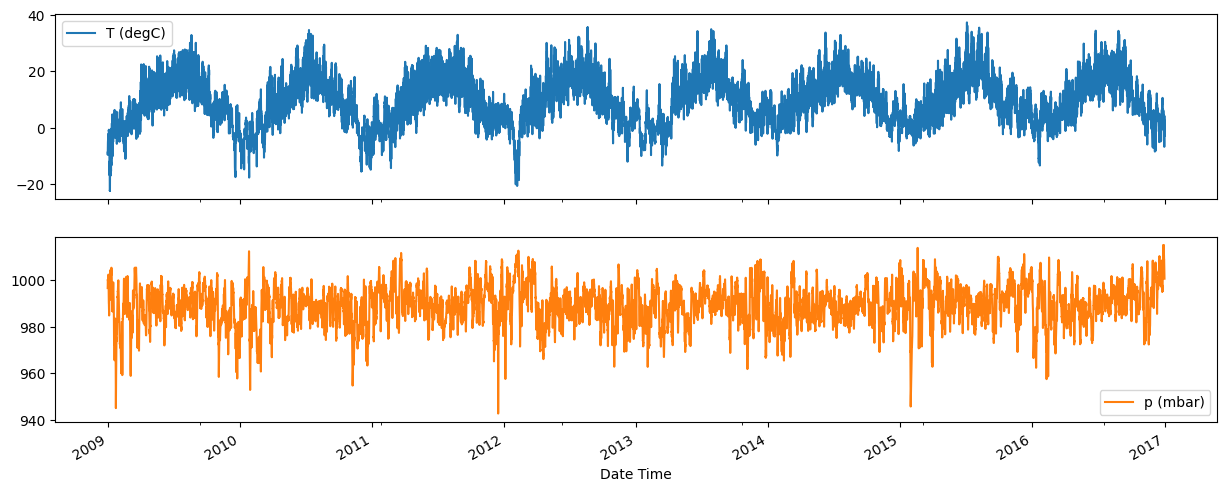

In [17]:
# lets plot the data
plot_cols = ['T (degC)', 'p (mbar)']
plot_features = df[plot_cols]
plot_features.index = data_time
plot_features.plot(subplots=True, figsize=(15, 6))

In [18]:
# !pip install --upgrade nbformat

In [19]:
# let's make the same plot using plotly 
fig = px.line(df, x=data_time, y='T (degC)')
fig.show()
fig = px.line(df, x=data_time, y='p (mbar)', color_discrete_sequence=['red'])
fig.show()

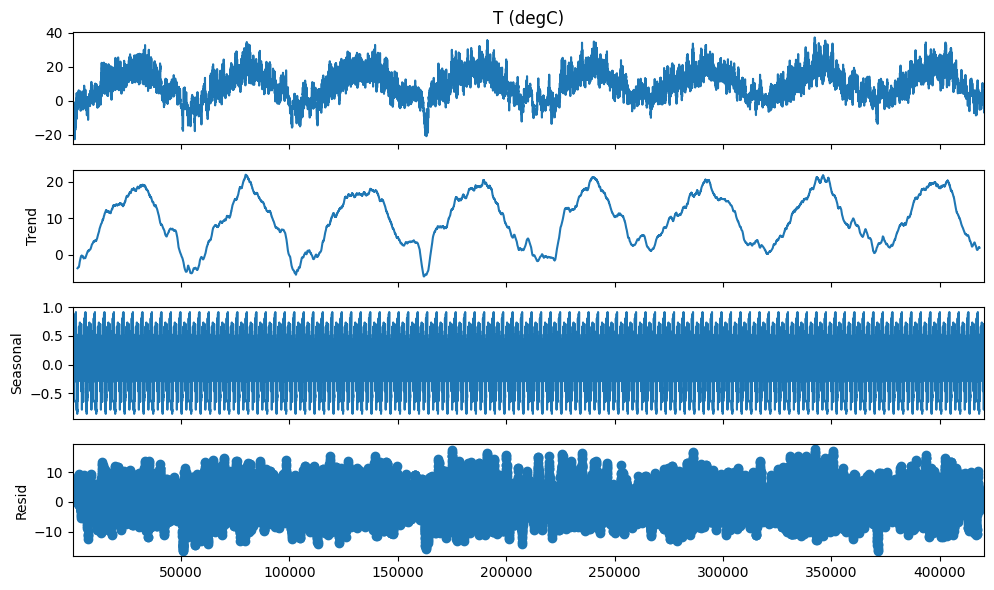

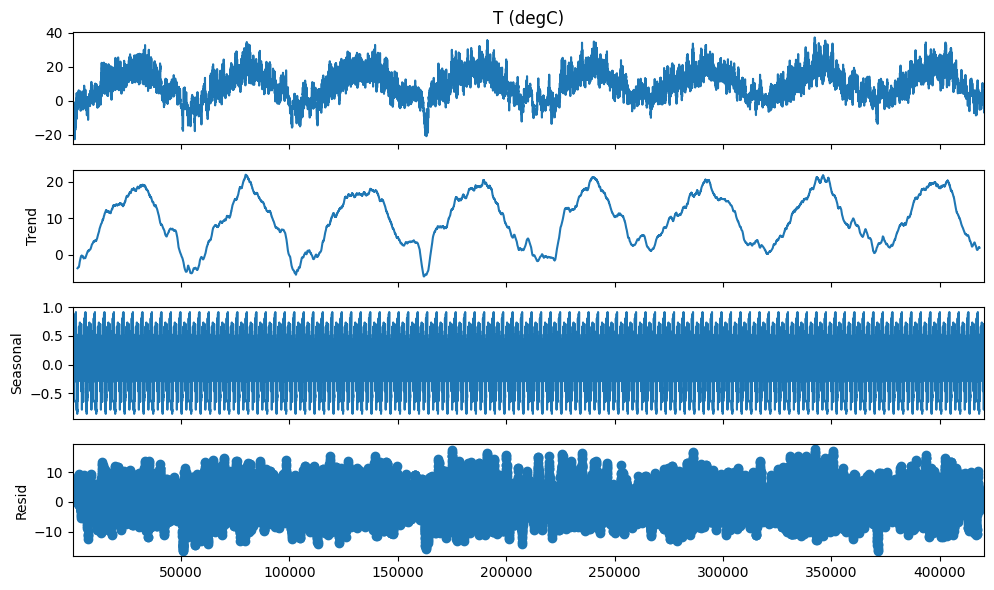

In [20]:
# let's decompose the data into trend, seasonality and noise
# we will use the seasonal_decompose function from statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['T (degC)'], model='additive', period=365)
result.plot()

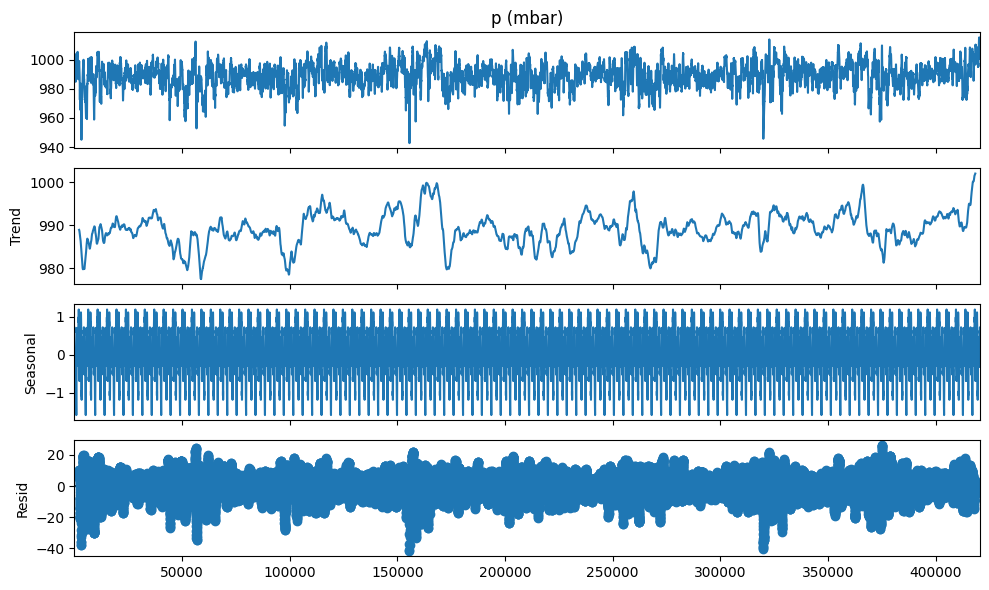

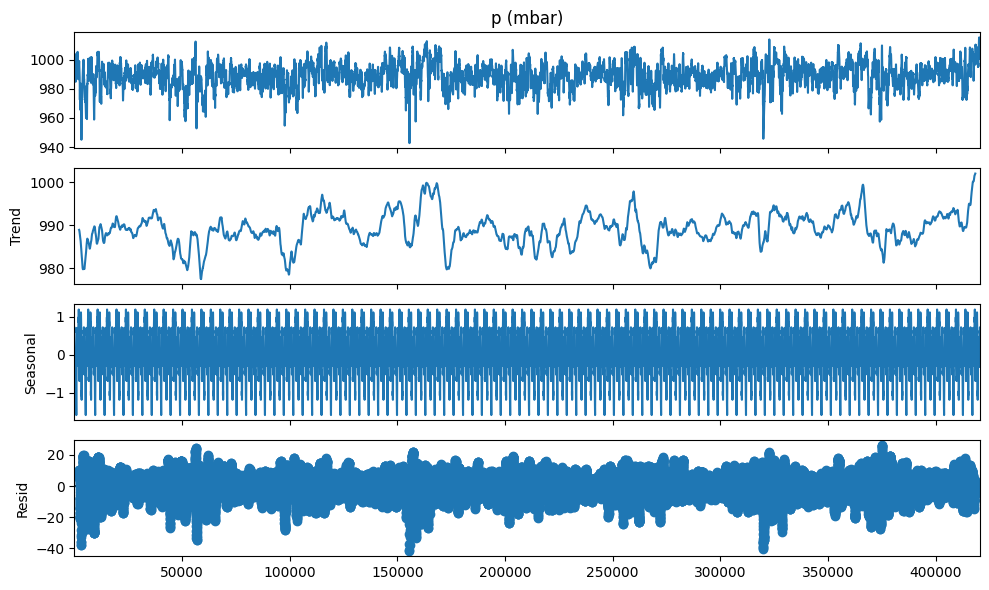

In [21]:
decompose = seasonal_decompose(df['p (mbar)'], model='additive', period=365)
decompose.plot()

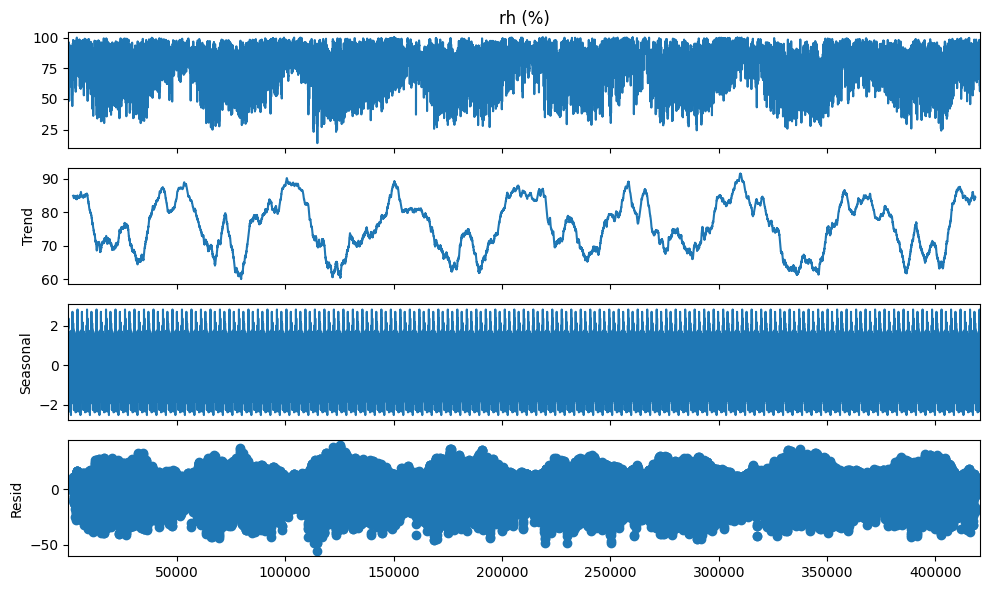

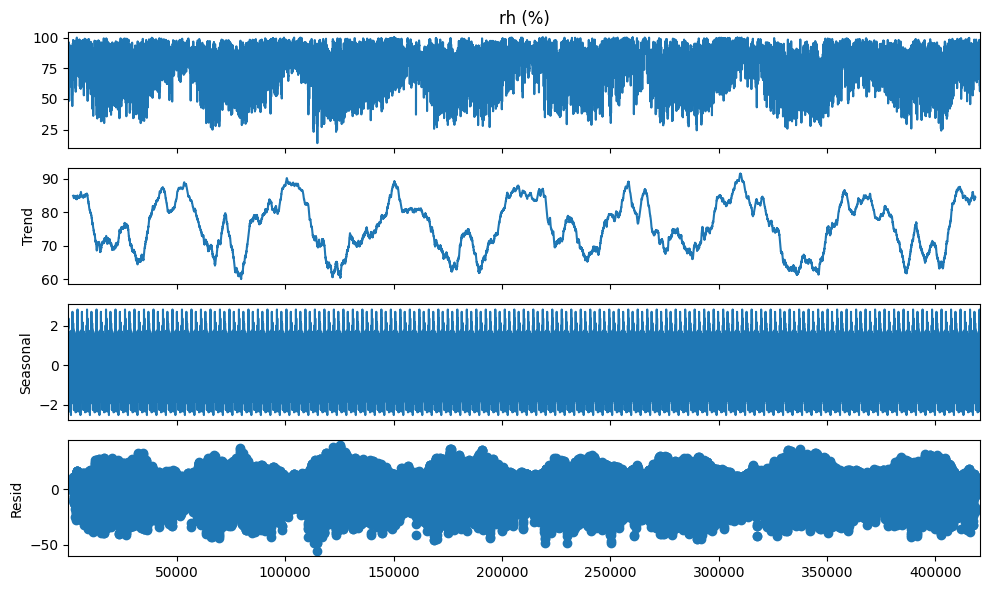

In [22]:
decompose = seasonal_decompose(df['rh (%)'], model='additive', period=365)
decompose.plot()

In [23]:
# lets plot only the first 500 hours dataset which is equal to 250 records
fig = px.line(df.head(250), x=data_time.head(250), y='T (degC)')
fig.show()
fig = px.line(df.head(250), x=data_time.head(250), y='p (mbar)', color_discrete_sequence=['red'])
fig.show()

In [24]:
# clean up the data
# lets chaek if there are any missing values
df.isnull().sum()

p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [25]:
df.describe().transpose()

count         mean        std      min      25%      50%  \
p (mbar)         35045.0   989.213079   8.353850   942.65   984.20   989.57   
T (degC)         35045.0     9.450335   8.425301   -22.50     3.36     9.43   
Tpot (K)         35045.0   283.492908   8.506133   251.22   277.44   283.48   
Tdew (degC)      35045.0     4.955012   6.729168   -24.55     0.24     5.22   
rh (%)           35045.0    76.006020  16.483440    13.88    65.15    79.30   
VPmax (mbar)     35045.0    13.577314   7.743076     0.99     7.77    11.83   
VPact (mbar)     35045.0     9.532714   4.181965     0.83     6.22     8.86   
VPdef (mbar)     35045.0     4.044542   4.902793     0.00     0.87     2.18   
sh (g/kg)        35045.0     6.021744   2.654692     0.52     3.92     5.60   
H2OC (mmol/mol)  35045.0     9.639148   4.233082     0.83     6.29     8.97   
rho (g/m**3)     35045.0  1216.063165  39.978039  1102.46  1187.47  1213.82   
wv (m/s)         35045.0     1.558001  75.567534 -9999.00     0.99     1.76   
max. wv (m/s)    35045.0     2.961995  75.598740 -9999.00     1.76     2.96   
wd (deg)         35045.0   174.660533  86.707469     0.00   125.20   198.10   

                     75%      max  
p (mbar)          994.72  1015.16  
T (degC)           15.49    37.28  
Tpot (K)          289.55   311.21  
Tdew (degC)        10.08    22.19  
rh (%)             89.50   100.00  
VPmax (mbar)       17.62    63.77  
VPact (mbar)       12.36    26.79  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.81    17.13  
H2OC (mmol/mol)    12.49    27.25  
rho (g/m**3)     1242.80  1391.41  
wv (m/s)            2.84    13.50  
max. wv (m/s)       4.73    23.50  
wd (deg)          233.60   360.00

In [26]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

In [27]:
df.describe().T

count         mean        std      min      25%      50%  \
p (mbar)         35045.0   989.213079   8.353850   942.65   984.20   989.57   
T (degC)         35045.0     9.450335   8.425301   -22.50     3.36     9.43   
Tpot (K)         35045.0   283.492908   8.506133   251.22   277.44   283.48   
Tdew (degC)      35045.0     4.955012   6.729168   -24.55     0.24     5.22   
rh (%)           35045.0    76.006020  16.483440    13.88    65.15    79.30   
VPmax (mbar)     35045.0    13.577314   7.743076     0.99     7.77    11.83   
VPact (mbar)     35045.0     9.532714   4.181965     0.83     6.22     8.86   
VPdef (mbar)     35045.0     4.044542   4.902793     0.00     0.87     2.18   
sh (g/kg)        35045.0     6.021744   2.654692     0.52     3.92     5.60   
H2OC (mmol/mol)  35045.0     9.639148   4.233082     0.83     6.29     8.97   
rho (g/m**3)     35045.0  1216.063165  39.978039  1102.46  1187.47  1213.82   
wv (m/s)         35045.0     2.128639   1.542289     0.00     0.99     1.76   
max. wv (m/s)    35045.0     2.961995  75.598740 -9999.00     1.76     2.96   
wd (deg)         35045.0   174.660533  86.707469     0.00   125.20   198.10   

                     75%      max  
p (mbar)          994.72  1015.16  
T (degC)           15.49    37.28  
Tpot (K)          289.55   311.21  
Tdew (degC)        10.08    22.19  
rh (%)             89.50   100.00  
VPmax (mbar)       17.62    63.77  
VPact (mbar)       12.36    26.79  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.81    17.13  
H2OC (mmol/mol)    12.49    27.25  
rho (g/m**3)     1242.80  1391.41  
wv (m/s)            2.84    13.50  
max. wv (m/s)       4.73    23.50  
wd (deg)          233.60   360.00

In [28]:
df.head(10)

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
11     996.62     -8.88    264.54        -9.77    93.2          3.12   
23     996.99     -9.05    264.34       -10.02    92.6          3.07   
35     997.71     -9.67    263.66       -10.62    92.7          2.93   
47     999.17     -8.10    265.12        -9.05    92.8          3.31   
59    1000.27     -7.04    266.10        -8.17    91.6          3.60   
71    1000.30     -6.87    266.27        -8.28    89.6          3.64   
83     999.81     -5.94    267.24        -7.43    89.1          3.92   
95     999.94     -5.40    267.76        -6.86    89.4          4.08   
107   1000.16     -5.25    267.90        -6.75    89.1          4.13   
119   1000.22     -4.90    268.24        -6.38    89.3          4.24   

     VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
11           2.90          0.21       1.81             2.91       1312.25   
23           2.85          0.23       1.78             2.85       1313.61   
35           2.71          0.21       1.69             2.72       1317.71   
47           3.07          0.24       1.92             3.08       1311.65   
59           3.30          0.30       2.05             3.29       1307.76   
71           3.27          0.38       2.03             3.26       1306.98   
83           3.49          0.43       2.17             3.49       1301.67   
95           3.65          0.43       2.27             3.65       1299.17   
107          3.68          0.45       2.29             3.68       1298.68   
119          3.79          0.45       2.36             3.78       1297.05   

     wv (m/s)  max. wv (m/s)  wd (deg)  
11       0.25           0.63     190.3  
23       0.10           0.38     240.0  
35       0.05           0.50     146.0  
47       0.72           1.25     213.9  
59       1.45           3.00     292.6  
71       1.84           2.63     184.4  
83       1.25           2.00     144.0  
95       1.40           2.13     145.5  
107      0.55           1.00     183.7  
119      0.68           1.13     195.2

In [29]:
max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

In [30]:
df.describe().T

count         mean        std      min      25%      50%  \
p (mbar)         35045.0   989.213079   8.353850   942.65   984.20   989.57   
T (degC)         35045.0     9.450335   8.425301   -22.50     3.36     9.43   
Tpot (K)         35045.0   283.492908   8.506133   251.22   277.44   283.48   
Tdew (degC)      35045.0     4.955012   6.729168   -24.55     0.24     5.22   
rh (%)           35045.0    76.006020  16.483440    13.88    65.15    79.30   
VPmax (mbar)     35045.0    13.577314   7.743076     0.99     7.77    11.83   
VPact (mbar)     35045.0     9.532714   4.181965     0.83     6.22     8.86   
VPdef (mbar)     35045.0     4.044542   4.902793     0.00     0.87     2.18   
sh (g/kg)        35045.0     6.021744   2.654692     0.52     3.92     5.60   
H2OC (mmol/mol)  35045.0     9.639148   4.233082     0.83     6.29     8.97   
rho (g/m**3)     35045.0  1216.063165  39.978039  1102.46  1187.47  1213.82   
wv (m/s)         35045.0     2.128639   1.542289     0.00     0.99     1.76   
max. wv (m/s)    35045.0     3.532633   2.343832     0.00     1.76     2.96   
wd (deg)         35045.0   174.660533  86.707469     0.00   125.20   198.10   

                     75%      max  
p (mbar)          994.72  1015.16  
T (degC)           15.49    37.28  
Tpot (K)          289.55   311.21  
Tdew (degC)        10.08    22.19  
rh (%)             89.50   100.00  
VPmax (mbar)       17.62    63.77  
VPact (mbar)       12.36    26.79  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.81    17.13  
H2OC (mmol/mol)    12.49    27.25  
rho (g/m**3)     1242.80  1391.41  
wv (m/s)            2.84    13.50  
max. wv (m/s)       4.73    23.50  
wd (deg)          233.60   360.00

# Modeling

In [31]:
df.shape

(35045, 14)

In [33]:
# split the data into validation and test I have 35045 records make 70% for training, 20% for validation and 10% for test 
# 70% of 35045 is 24531
# 20% of 35045 is 7009
# 10% of 35045 is 3504
# train data
train_df = df[:24531]
# validation data
val_df = df[24531:31540]
# test data
test_df = df[31540:]
# lets check the shape of the data
train_df.shape, val_df.shape, test_df.shape

((24531, 14), (7009, 14), (3505, 14))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

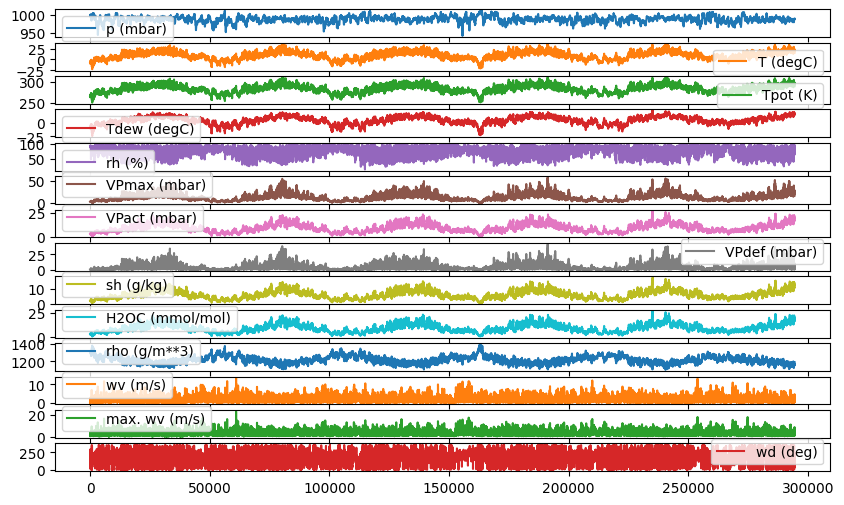

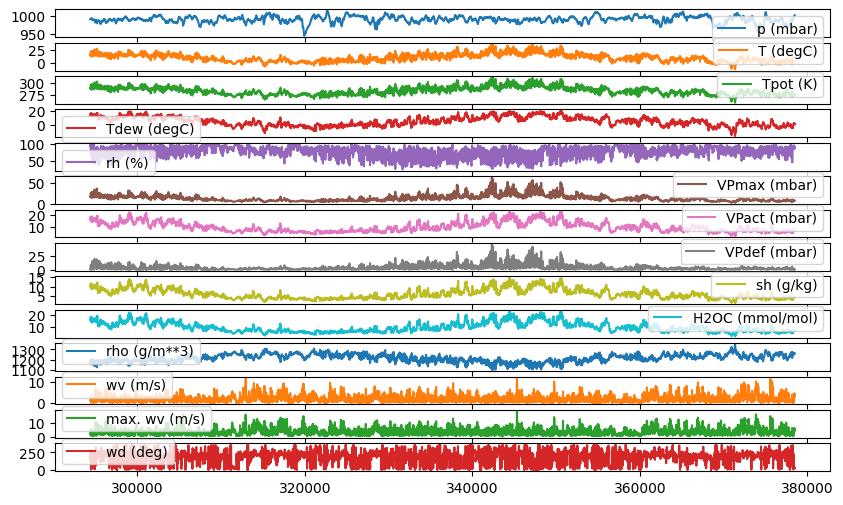

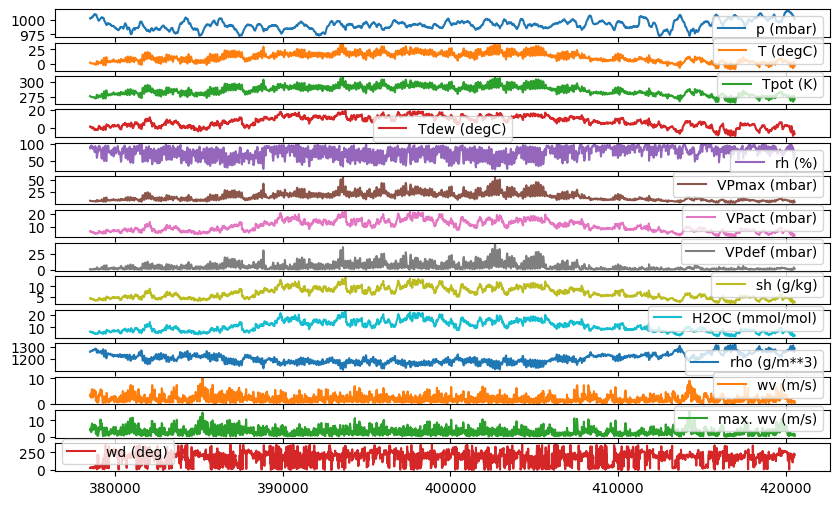

In [35]:
# lets plot the data
train_df.plot(subplots=True)
# lets plot the validation data
val_df.plot(subplots=True)
# lets plot the test data
test_df.plot(subplots=True)

In [36]:
# lets normalize the data
# we will use the mean and standard deviation to normalize the data
train_mean = train_df.mean()
train_std = train_df.std()

# lets normalize the training data
train_df = (train_df - train_mean) / train_std
# lets normalize the validation data
val_df = (val_df - train_mean) / train_std
# lets normalize the test data
test_df = (test_df - train_mean) / train_std


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

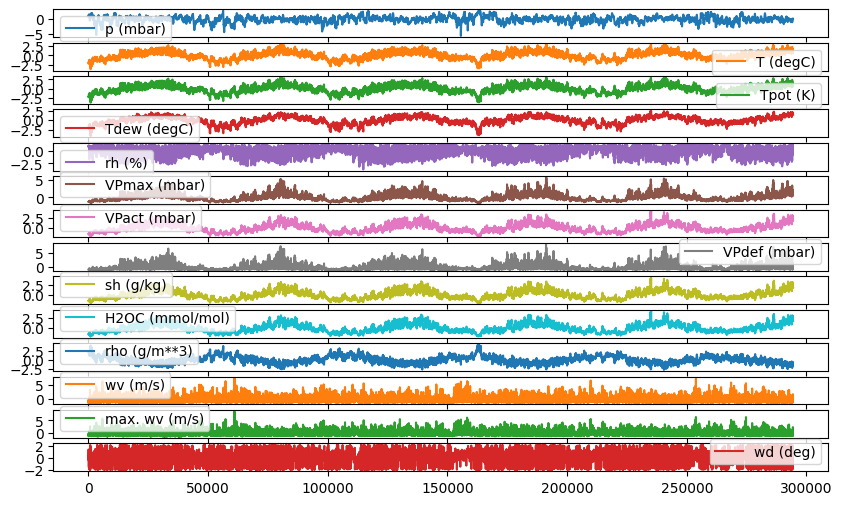

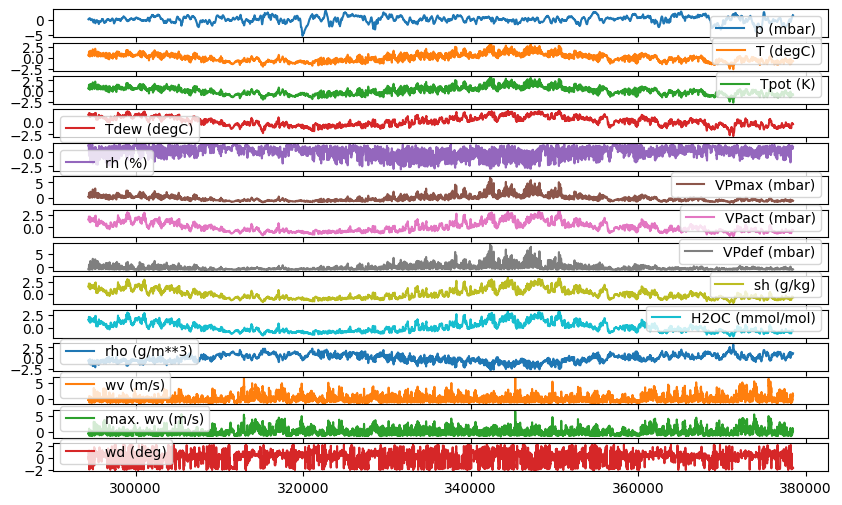

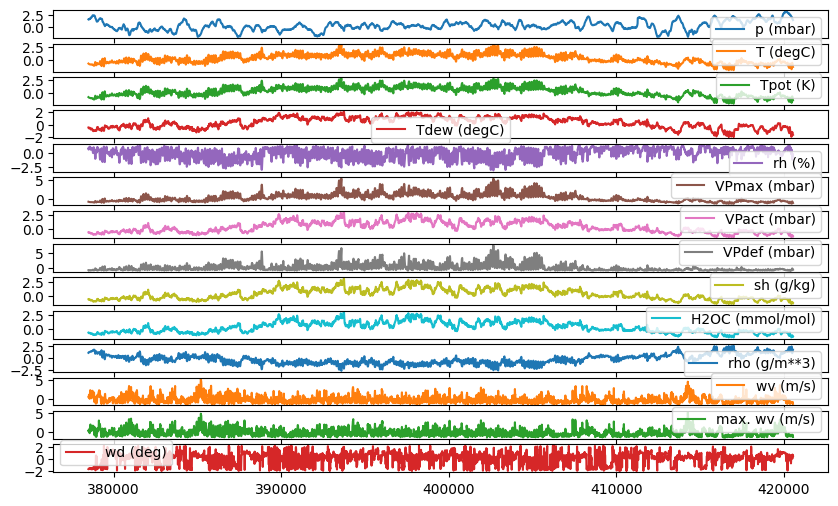

In [37]:
# lets plot the data
train_df.plot(subplots=True)
# lets plot the validation data
val_df.plot(subplots=True)
# lets plot the test data
test_df.plot(subplots=True)

------